In [29]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
)

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
classifier.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(random_state=RandomState(MT19937) at 0x7F048493D7C0))])

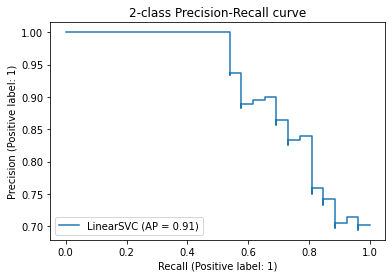

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

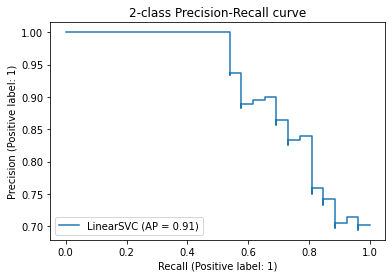

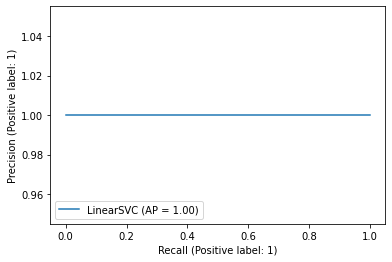

In [32]:
from sklearn.metrics import precision_recall_curve
y_score = classifier.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

precision, recall, threshold = precision_recall_curve(y_test, y_score)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test, name="LinearSVC")

In [33]:
real.

SyntaxError: invalid syntax (4132607415.py, line 1)

Text(0, 0.5, 'Precision')

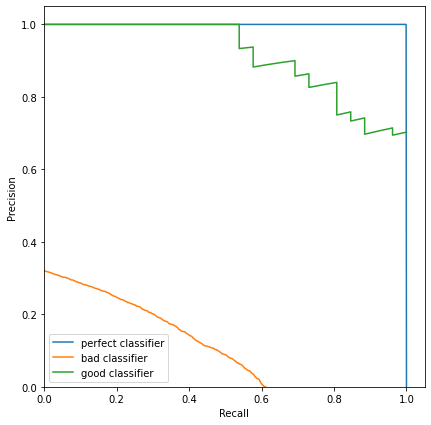

In [34]:
import numpy as np
import matplotlib.pyplot as plt

per = np.ones(1000)

acc = np.ones(500)
"""
acc[0:40] = 0.95 

acc[40:120] = 0.92

acc[120:180] = 0.86

acc[180:260] = 0.82

acc[260:390] = 0.73

acc[390:440] = 0.67

acc[440:480] = 0.52

acc[480:500] = 0.4
"""
rec = np.linspace(0, 1, 500)

red = np.cumsum(np.abs(np.random.normal(0, 5, 500)))

red = np.log(red/red.max()) #- 1

red = red/red.min()

red = np.flip(red)

acc = acc - np.cumsum(np.abs(np.random.normal(0, 0.00003, 500)))

good = acc - red*1.45 #- 0.05

bad = good*1.52 - 1.2

good[-1] = 0
per[-1] = 0

fig = plt.figure(figsize=(7, 7))
plt.plot(np.linspace(0, 1, 1000), per, label = 'perfect classifier')
plt.plot(rec, bad, label = 'bad classifier')
plt.plot(recall, precision, label ='good classifier')
plt.axis('scaled')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")


Text(0, 0.5, 'Accuracy')

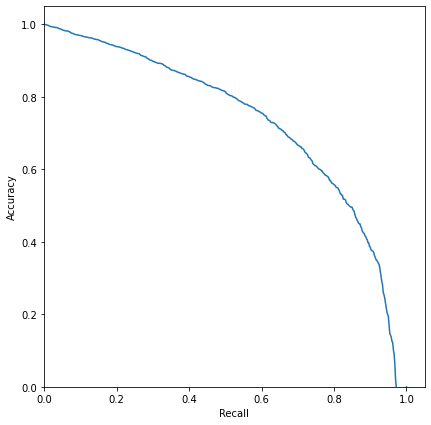

In [3]:
fig = plt.figure(figsize=(7, 7))
plt.plot(rec, good)
plt.axis('scaled')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.xlabel("Recall")
plt.ylabel("Accuracy")


Text(0.9339679358717433, 0.12000000000000001, 'Recall: 0.95')

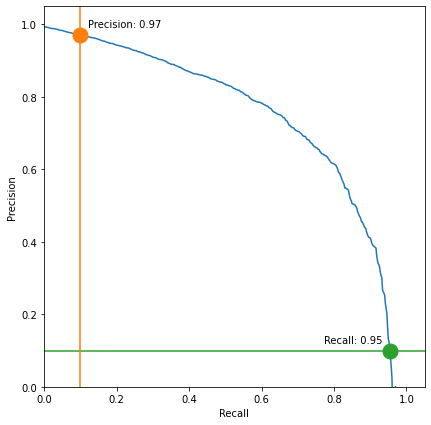

In [35]:
rec2 = rec-0.03

fig = plt.figure(figsize=(7, 7))
plt.plot(rec2, good)
plt.axis('scaled')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.hlines(0.1, 0, 1.5, colors='tab:green')
plt.vlines(0.1, 0, 1.5, colors='tab:orange')

acc_score = good[np.argmin(np.abs(rec2 - 0.1))]
rec_score = rec2[np.argmin(np.abs(good - 0.1))]

plt.plot([0.1], [acc_score], marker="o", markersize=15)
plt.plot([rec_score], [0.1], marker="o", markersize=15)

plt.text(0.1 + 0.02, acc_score + 0.02, 'Precision: ' + str(acc_score)[0:4])
plt.text(rec_score - 0.02, 0.1 + 0.02, 'Recall: ' + str(rec_score)[0:4], horizontalalignment='right')